In [36]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.3 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('C:/Users/uday8/Documents/Msc. DSAI/SEM 2/TSA/Data/AirPassengers.csv',
                 parse_dates=['Month'],index_col='Month')
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
time_series = pd.Series(df['#Passengers']) #converting data into series

In [12]:
# adf_test
def adf_test(series):
    result = adfuller(series)
    print('Adf Statistics:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f' {key}:{value}')
    if result[1] <= 0.05:   # p-value is responsible for considering data is stationary or not
        print('The series is Stationary')
    else:
        print('The series is not Stationary')

print("\nADF Test for differencing Series:")
adf_test(df['#Passengers'])


ADF Test for differencing Series:
Adf Statistics: 0.8153688792060482
p-value: 0.991880243437641
Critical Values:
 1%:-3.4816817173418295
 5%:-2.8840418343195267
 10%:-2.578770059171598
The series is not Stationary


In [13]:
df['#Passengers_diff'] = df['#Passengers'].diff(2).dropna()
adf_test(df['#Passengers_diff'].dropna())

Adf Statistics: -2.9616951355554244
p-value: 0.03862975767698839
Critical Values:
 1%:-3.4816817173418295
 5%:-2.8840418343195267
 10%:-2.578770059171598
The series is Stationary


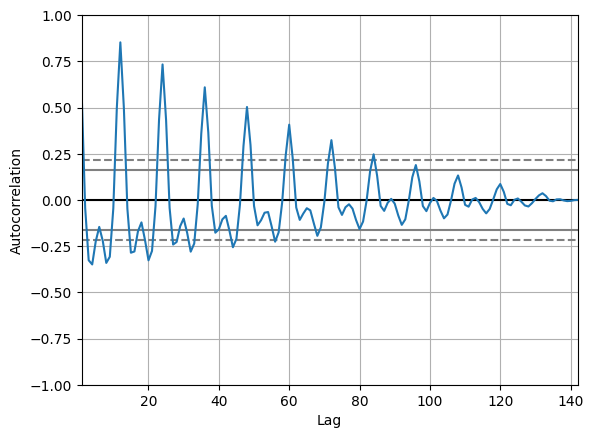

In [14]:
autocorrelation_plot(df['#Passengers_diff'].dropna())
plt.show()

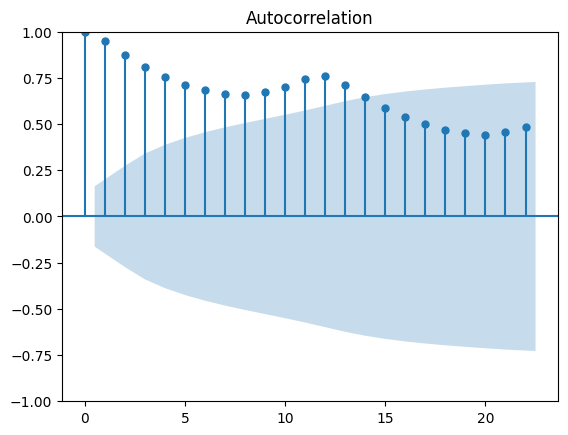

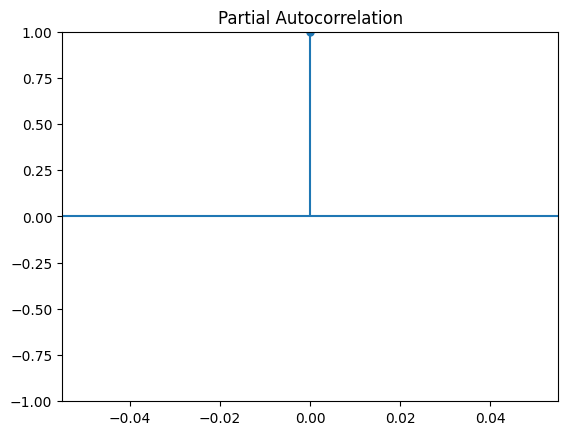

In [15]:
acf_diff = plot_acf(df['#Passengers'])
pacf_diff = plot_pacf(df['#Passengers_diff'], method = 'ywm')

In [21]:
# dont use differencing for stationary conversion
"""diff_series = time_series.diff(2).dropna() #differencing

plt.figure(figsize = (10,4))
plt.plot(diff_series, label = 'Differenced Series')
plt.title("Stationary Time series after differencing")
plt.legend()
plt.show()

print("\nADF Test for differencing Series:")
adf_test(diff_series)"""

'diff_series = time_series.diff(2).dropna() #differencing\n\nplt.figure(figsize = (10,4))\nplt.plot(diff_series, label = \'Differenced Series\')\nplt.title("Stationary Time series after differencing")\nplt.legend()\nplt.show()\n\nprint("\nADF Test for differencing Series:")\nadf_test(diff_series)'

p - AR (autoregressive)

d - I (differencing)

q - MA (moving average)

In [16]:
model = auto_arima(df['#Passengers'], seasonal = False, stepwise = True, trace = True) # auto arima is used for finding optimized value
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

In [17]:
model = ARIMA(df['#Passengers'], order = (4,2,3)) # p, d, q
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(4, 2, 3)   Log Likelihood                -680.232
Date:                Wed, 05 Feb 2025   AIC                           1376.464
Time:                        10:16:10   BIC                           1400.111
Sample:                    01-01-1949   HQIC                          1386.074
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1639      0.094    -12.442      0.000      -1.347      -0.981
ar.L2         -0.4049      0.142     -2.844      0.004      -0.684      -0.126
ar.L3         -0.1055      0.125     -0.847      0.3

In [18]:
# forecast future values
forecast_steps = 20
forecast = model_fit.forecast(steps = forecast_steps)
forecast

1961-01-01    476.780672
1961-02-01    480.725320
1961-03-01    488.210973
1961-04-01    464.646142
1961-05-01    479.032882
1961-06-01    477.047542
1961-07-01    480.675216
1961-08-01    492.256212
1961-09-01    479.537098
1961-10-01    497.542206
1961-11-01    486.643408
1961-12-01    496.471168
1962-01-01    499.919746
1962-02-01    493.713639
1962-03-01    510.182047
1962-04-01    496.924349
1962-05-01    512.539271
1962-06-01    507.881440
1962-07-01    509.602994
1962-08-01    520.417256
Freq: MS, Name: predicted_mean, dtype: float64

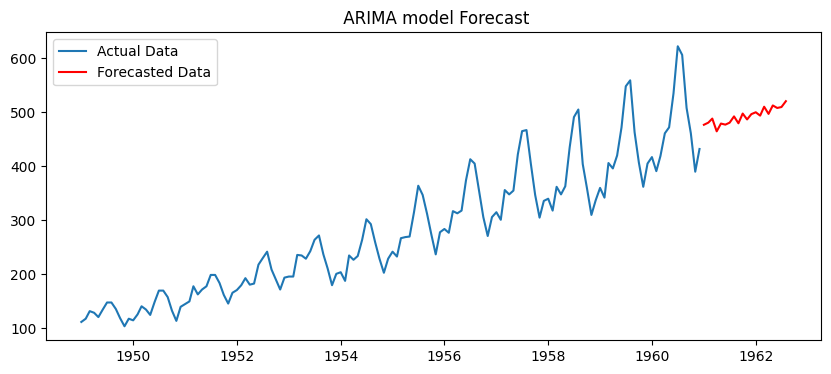

In [19]:
plt.figure(figsize=(10, 4))
plt.plot(df['#Passengers'], label='Actual Data')
plt.plot(forecast, label='Forecasted Data', color = 'red')
plt.title(" ARIMA model Forecast")
plt.legend()
plt.show()

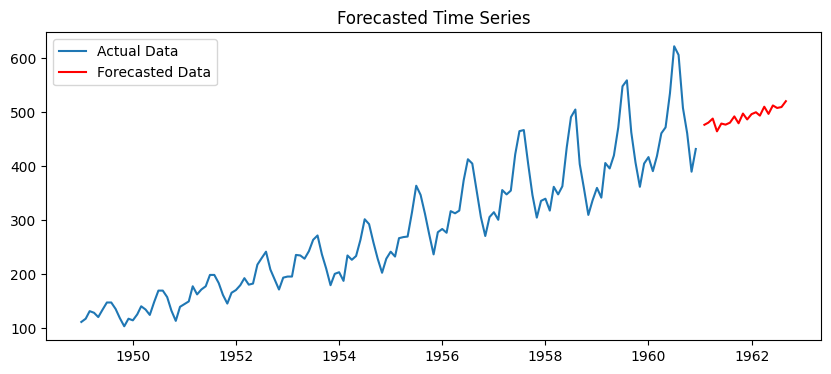

In [20]:
# sir ka code
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['#Passengers'], label='Actual Data')
plt.plot(pd.date_range(df.index[-1], periods = forecast_steps + 1, freq = 'M')[1:], forecast, label='Forecasted Data', color = 'red')
plt.title("Forecasted Time Series")
plt.legend()
plt.show()